In [3]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

# CS:GO Round Winner Classification


URL: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

In [4]:
df_cs = pd.read_csv(os.path.join('dataset', 'csgo_round_snapshots.csv'))
df_cs.shape

(122410, 97)

In [5]:
df_cs.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [6]:
df_cs.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [7]:
df_cs.replace('CT', 1, inplace=True)
df_cs.replace('T', 0, inplace=True)
df_cs.drop('map', axis=1, inplace=True)
df_cs['bomb_planted'] = df_cs['bomb_planted'].astype(int)

Y = df_cs['round_winner']
scaler = StandardScaler()
X = scaler.fit_transform(df_cs.drop('round_winner', axis=1))

df_cs_scaled = pd.DataFrame(X, columns=df_cs.drop('round_winner', axis=1).columns)
df_cs_scaled['round_winner'] = Y

In [ ]:
vif = [variance_inflation_factor(df_cs_scaled.values, i) for i in range(len(df_cs_scaled.columns) - 1)]

In [ ]:
vif_df = pd.DataFrame(vif, columns=['vif'])
vif_df['features'] = df_cs_scaled.columns[:-1]
vif_remove = vif_df[vif_df['vif'] > 5].sort_values(['vif'], ascending=False)

df_cs_scaled = df_cs_scaled.drop(vif_remove['features'], axis=1)

vif_remove

In [8]:
# default 0.25 test
train, test = train_test_split(df_cs_scaled)

# p = 1

In [9]:
train_input_var = train['time_left'].values.reshape(-1, 1)
train_input_target = train['round_winner'].astype(int)

test_input_var = test['time_left'].values.reshape(-1, 1)
test_input_target = test['round_winner'].astype(int)

In [10]:
model = LinearDiscriminantAnalysis()
model = model.fit(train_input_var, train_input_target)

## Train eval

In [11]:
model.score(train_input_var, train_input_target)

0.5190889583582952

In [12]:
confusion_matrix(train_input_target, model.predict(train_input_var).astype(float))

array([[30021, 16821],
       [27330, 17635]])

## Test eval

In [13]:
model.score(test_input_var, test_input_target)

0.5235761199882365

In [14]:
confusion_matrix(test_input_target, model.predict(test_input_var).astype(float))

array([[9953, 5611],
       [8969, 6070]])

# p > 1

In [15]:
train_input_var = train.drop(['round_winner', 'map'], axis=1)
train_input_target = train['round_winner'].astype(int)

test_input_var = test.drop(['round_winner', 'map'], axis=1)
test_input_target = test['round_winner'].astype(int)

In [16]:
model = LinearDiscriminantAnalysis()
model = model.fit(train_input_var, train_input_target)

In [17]:
train.columns[np.argmax(model.coef_)]

't_health'

## Train eval

In [18]:
model.score(train_input_var, train_input_target)

0.7478079013582842

In [19]:
confusion_matrix(train_input_target, model.predict(train_input_var).astype(float))

array([[34201, 12641],
       [10512, 34453]])

In [ ]:
plot_roc_curve(model, train_input_var, train_input_target)

## Test eval

In [20]:
model.score(test_input_var, test_input_target)

0.750416625820998

In [21]:
confusion_matrix(test_input_target, model.predict(test_input_var).astype(float))

array([[11405,  4159],
       [ 3479, 11560]])

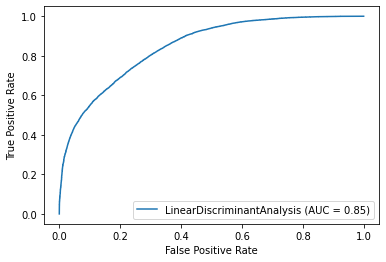

In [22]:
plot_roc_curve(model, test_input_var, test_input_target)

In [9]:
selected = ['ct_armor', 't_armor', 't_helmets', 'ct_defuse_kits', 'ct_weapon_aug',
       'ct_weapon_bizon', 't_weapon_elite', 'ct_weapon_g3sg1',
       'ct_weapon_galilar', 'ct_weapon_m249', 't_weapon_m249',
       't_weapon_m4a1s', 'ct_weapon_mag7', 'ct_weapon_mp7', 'ct_weapon_negev',
       't_weapon_negev', 't_weapon_p90', 'ct_weapon_fiveseven',
       'ct_weapon_p250', 't_grenade_flashbang']

In [10]:
train_input_var = train[selected]
train_input_target = train['round_winner'].astype(int)

test_input_var = test[selected]
test_input_target = test['round_winner'].astype(int)

In [11]:
model = LinearDiscriminantAnalysis()
model = model.fit(train_input_var, train_input_target)

In [12]:
model.score(train_input_var, train_input_target)

0.7383750694391495

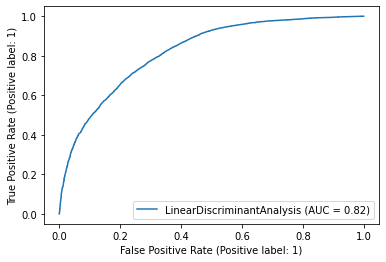

In [13]:
plot_roc_curve(model, test_input_var, test_input_target)